In [0]:
!nvidia-smi

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
from matplotlib import pyplot as plt

In [0]:
directory = "/content/drive/My Drive/Colab Notebooks/bottle"
width = height = 224
batch_size = 32

In [0]:
data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=8,
    width_shift_range=0.5,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    #   zoom = 20,
    fill_mode='nearest',
    validation_split = 0.1
    )

train_data = data_generator.flow_from_directory(
        directory,
        target_size=(width, height),
        batch_size = batch_size,
        class_mode='categorical',
        subset = 'training')
 
validation_data = data_generator.flow_from_directory(
        directory,
        target_size=(width, height),
        class_mode='categorical',
        batch_size = batch_size,
        shuffle=True,
        subset = 'validation')

Found 2209 images belonging to 28 classes.
Found 233 images belonging to 28 classes.


In [0]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(width, height, 3),
    alpha=1.0,
    include_top=False, 
    weights='imagenet', 
    input_tensor=None, 
    pooling='avg')

9412608/9406464 [==============================] - 0s 0us/step


In [0]:
#@title
base_model = tf.keras.applications.vgg19.VGG19(
    input_shape=(width, height, 3),
    include_top=False, 
    weights='imagenet', 
    input_tensor=None, 
    pooling='avg')

In [0]:
print(base_model.summary())

In [0]:
tf.keras.utils.plot_model(base_model, show_shapes=True)

In [0]:
#@title
model = Sequential()
model.add(base_model)
model.add(Dense(4096, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(28, activation='softmax'))

In [0]:
model = tf.keras.models.Sequential([
    base_model,
    Dense(28, activation='softmax')
])

In [0]:
#@title
model = tf.keras.models.Sequential([
    base_model,
    Dense(4096, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(28, activation='softmax')
])

In [0]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(
                  learning_rate=0.001, 
                  rho=0.95, 
                  epsilon=1e-07, 
                  name='Adadelta'),
              metrics=['acc'])

In [0]:
history = model.fit(
    train_data,
    steps_per_epoch = train_data.samples // batch_size,
    epochs=100,
    shuffle = True,
    validation_data=validation_data,
    validation_steps = validation_data.samples // batch_size,
    verbose = 1)

Epoch 1/100
69/69 [==============================] - 763s 11s/step - loss: 3.5640 - acc: 0.0473 - val_loss: 3.6617 - val_acc: 0.0312
Epoch 2/100
69/69 [==============================] - 85s 1s/step - loss: 3.4634 - acc: 0.0634 - val_loss: 3.6477 - val_acc: 0.0491
Epoch 3/100
69/69 [==============================] - 85s 1s/step - loss: 3.3933 - acc: 0.0689 - val_loss: 3.5791 - val_acc: 0.0446
Epoch 4/100
69/69 [==============================] - 85s 1s/step - loss: 3.3068 - acc: 0.0868 - val_loss: 3.5193 - val_acc: 0.0446
Epoch 5/100
69/69 [==============================] - 85s 1s/step - loss: 3.2451 - acc: 0.0988 - val_loss: 3.4727 - val_acc: 0.0580
Epoch 6/100
69/69 [==============================] - 84s 1s/step - loss: 3.1646 - acc: 0.1203 - val_loss: 3.4099 - val_acc: 0.0491
Epoch 7/100
69/69 [==============================] - 85s 1s/step - loss: 3.1170 - acc: 0.1364 - val_loss: 3.3950 - val_acc: 0.0714
Epoch 8/100
69/69 [==============================] - 87s 1s/step - loss: 3.0341 -

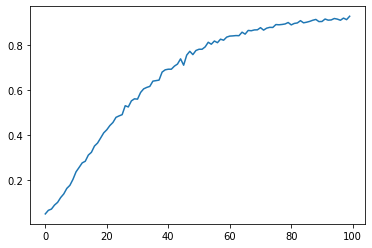

In [0]:
from matplotlib import pyplot as plt

# plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.show()

In [0]:
model.save('my_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_model/assets


In [0]:
import shutil
shutil.make_archive('my_model', 'zip', 'my_model')

'/content/my_model.zip.zip'

In [0]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('my_model')
tflite_model = converter.convert()
open("farazist.tflite", "wb").write(tflite_model)

8992236

In [0]:
import cv2 as cv
img = cv.imread('photo.jpg')
img = cv.resize(img, (299, 299))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img = img / 255.0

img = img.reshape(1, 299, 299, 3)

y_pred = model.predict(img)
print(y_pred)
print(np.argmax(y_pred))

[[2.9779755e-04 4.9298689e-07 7.6740027e-05 1.3062366e-09 7.1239114e-08
  2.4361536e-02 9.1198422e-03 1.0068750e-05 5.9401607e-08 6.7065279e-03
  9.4462734e-01 8.7986784e-03 2.7636106e-05 2.2263576e-03 4.7452792e-07
  3.4970781e-03 6.0583574e-05 3.6783764e-05 1.3073877e-04 2.1177702e-05]]
10


In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))